In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_rows", 40)

x_train = pd.read_csv('C:/ML_LABS/RGR_train.csv',  header=None)
y_train = pd.read_csv('C:/ML_LABS/RGR_trainLabels.csv',  header=None)
x_test = pd.read_csv('C:/ML_LABS/RGR_test.csv',  header=None)

In [3]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.310429,0.826811,-0.952245,0.768850,1.877520,1.320646,1.944609,1.191420,-0.127724,0.070937,...,-0.600411,-0.383792,0.745596,-0.698598,-2.729937,-0.431535,0.372873,1.019092,-2.672811,-0.295141
996,-1.853879,0.246726,0.459921,-2.074267,7.599220,-0.138355,-4.501900,0.630634,-1.590533,-1.112949,...,0.361736,0.240052,-0.856196,-0.072481,-2.935896,0.582411,-2.613407,0.036687,2.809310,4.412567
997,0.912748,-1.734039,-1.047035,0.217573,13.457812,0.162771,-2.250521,2.216161,-0.378326,0.642114,...,1.195896,-1.073806,-2.754369,1.814864,-4.190105,-1.116441,-2.100125,0.061513,0.895536,0.813686
998,2.439780,-0.735511,-0.902426,1.365036,-10.430299,-0.856859,2.686474,0.292035,0.585388,-0.876965,...,2.262326,-0.039488,0.773876,-0.916066,2.604827,-0.649874,-3.423674,0.229748,-2.311088,-3.422217


# EDA

In [4]:
# check continuos 
x_train.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
dtype: object

In [5]:
missing_value = x_train.isnull().sum()
percent_missing = x_train.isnull().sum() * 100 / len(x_train)
missing_value_df = pd.DataFrame({
	'count_missing': missing_value,
	'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

# no missing data

,count_missing,percent_missing
0,0,0.0
22,0,0.0
23,0,0.0
24,0,0.0
25,0,0.0
26,0,0.0
27,0,0.0
28,0,0.0
21,0,0.0
29,0,0.0


In [6]:
# no duplicated rows
x_train[x_train.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39


In [7]:
x_train.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [8]:
def plot_continuous(data, col):
    plt.figure(figsize=[12, 4])   
    sns.histplot(data[col], bins=50, kde=True, color="g")   
    plt.show()

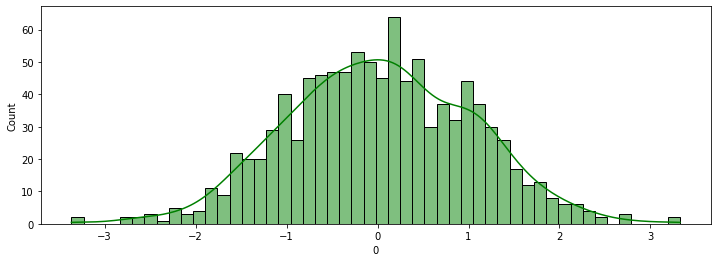

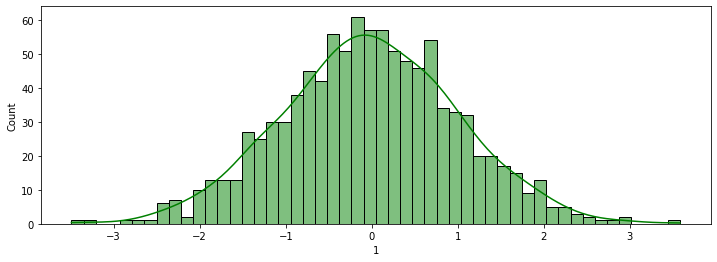

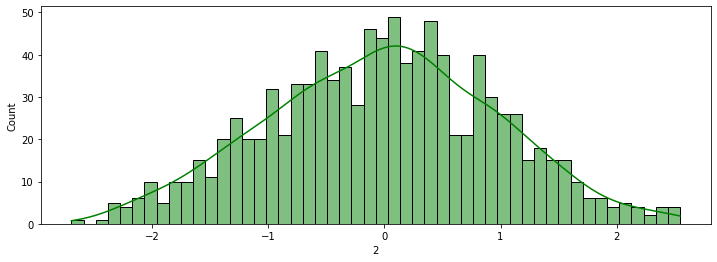

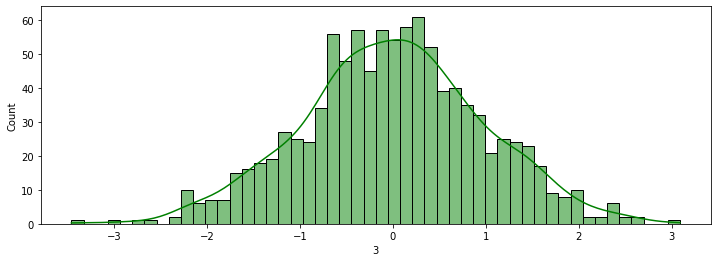

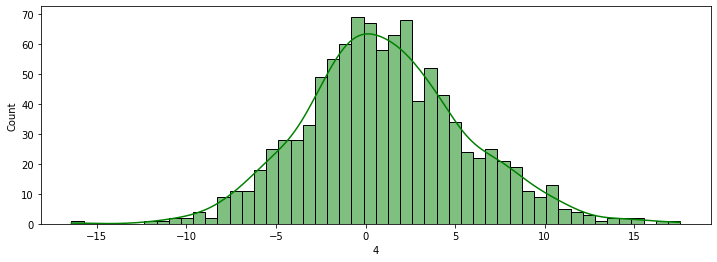

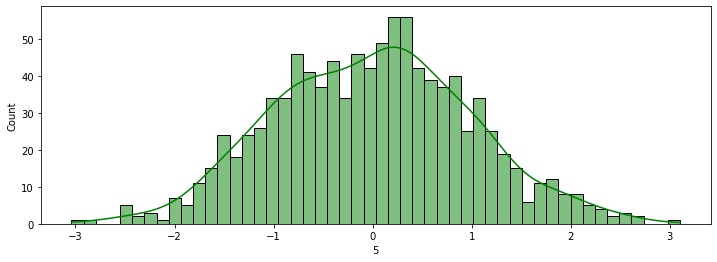

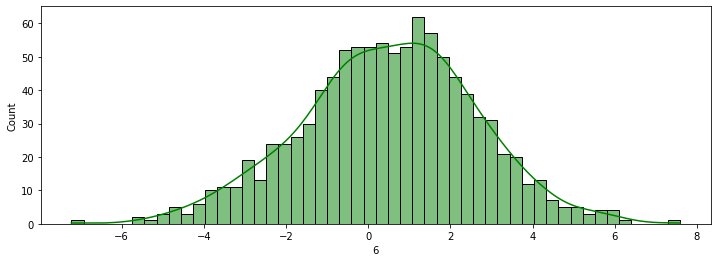

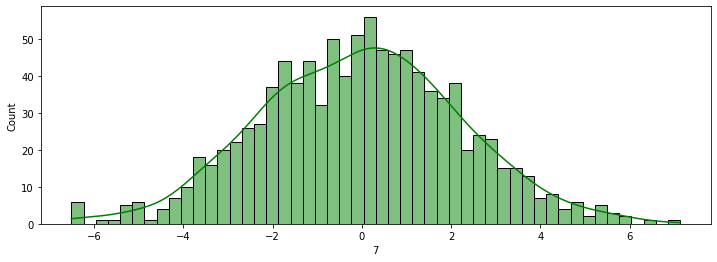

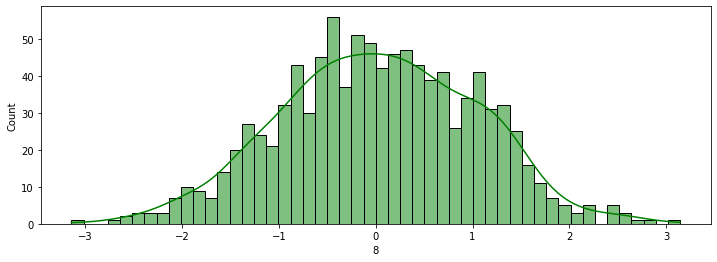

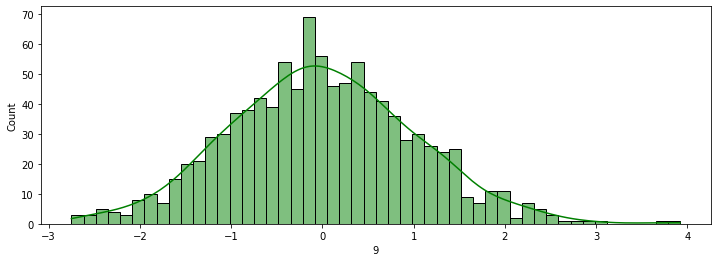

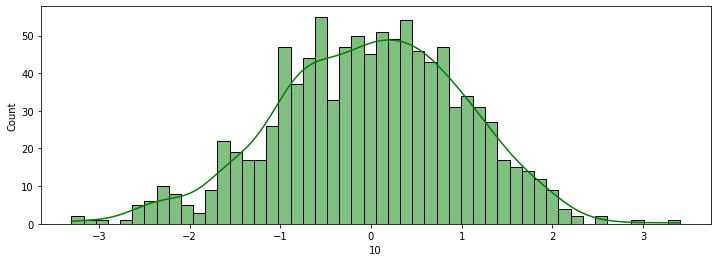

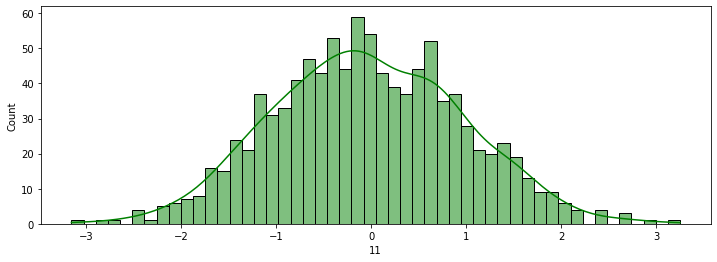

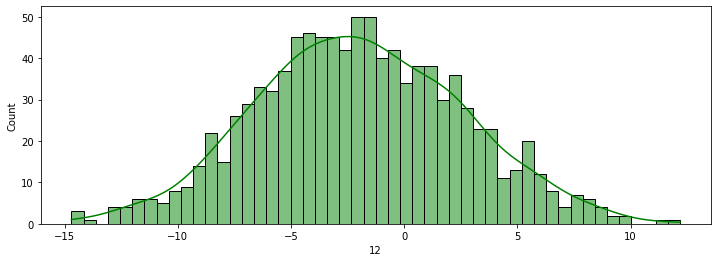

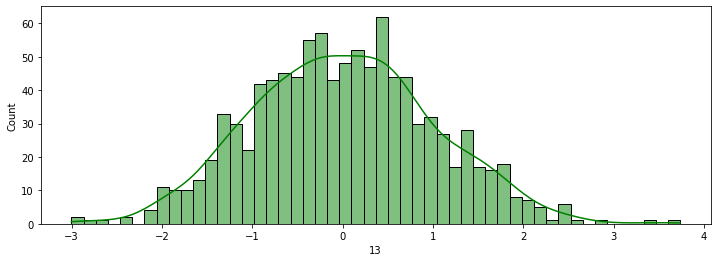

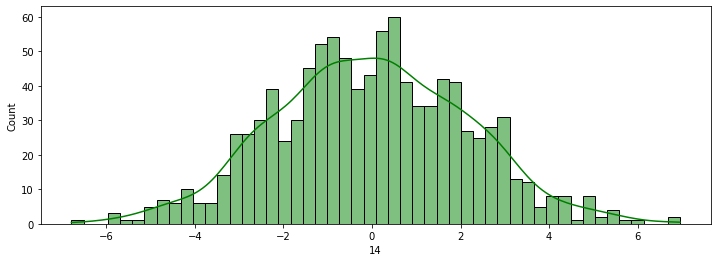

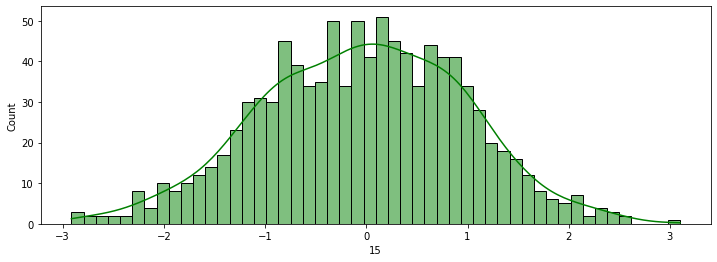

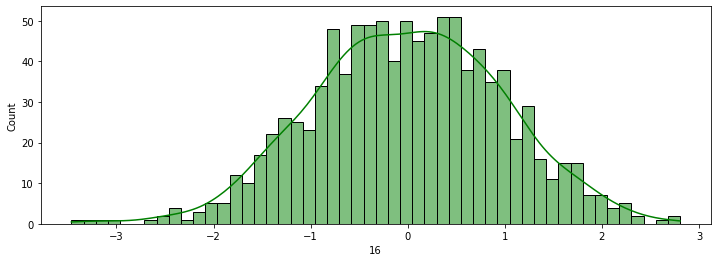

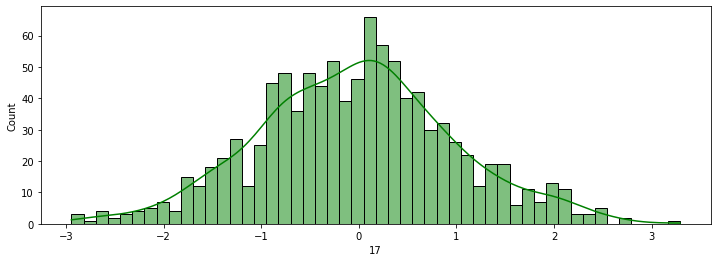

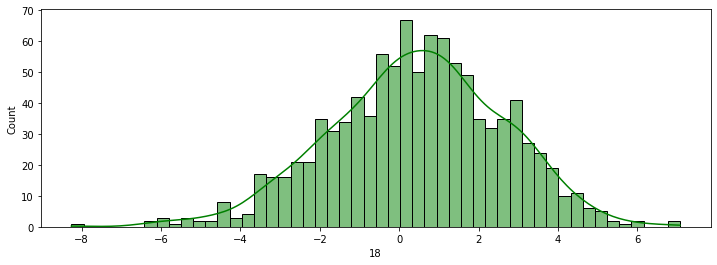

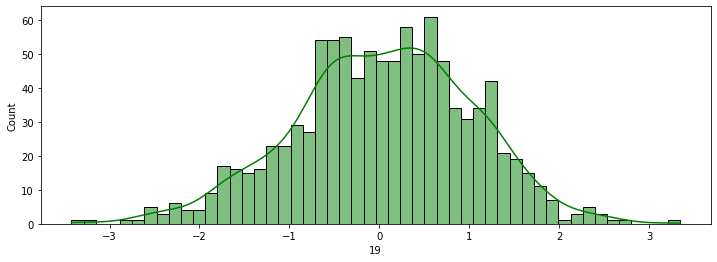

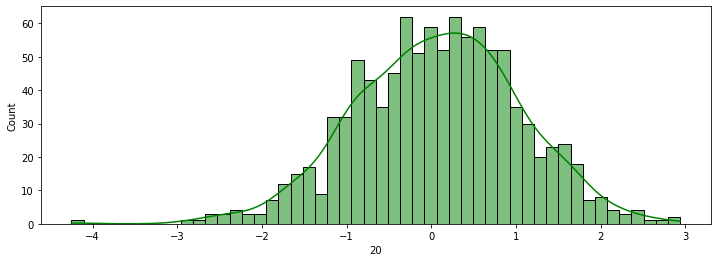

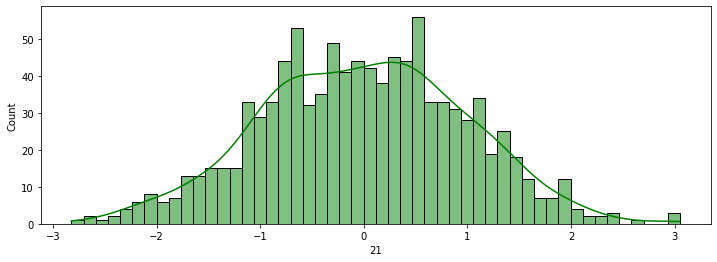

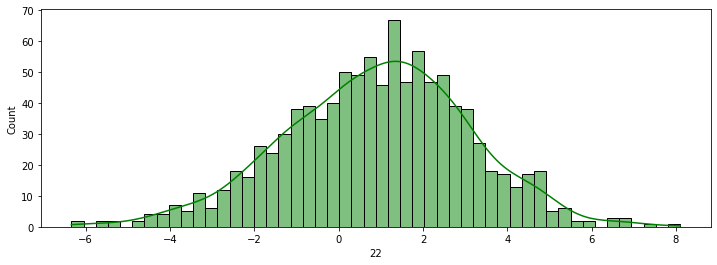

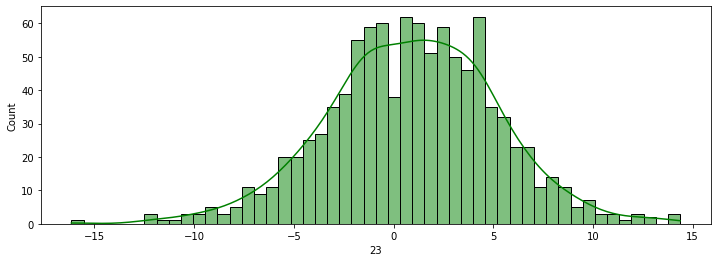

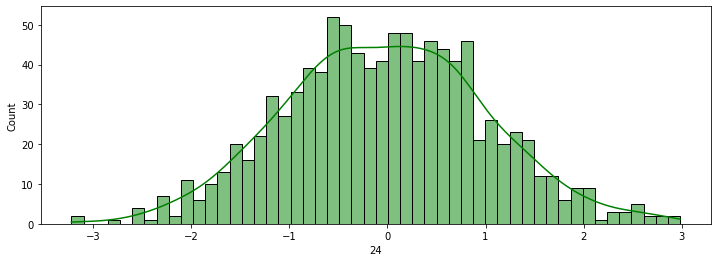

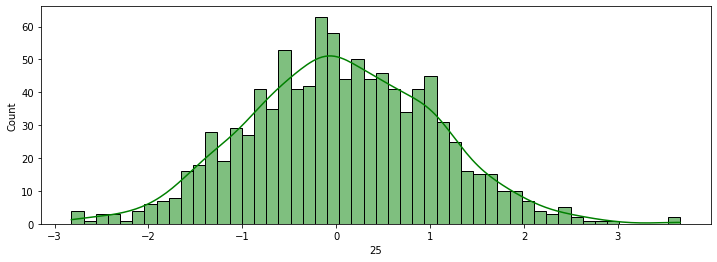

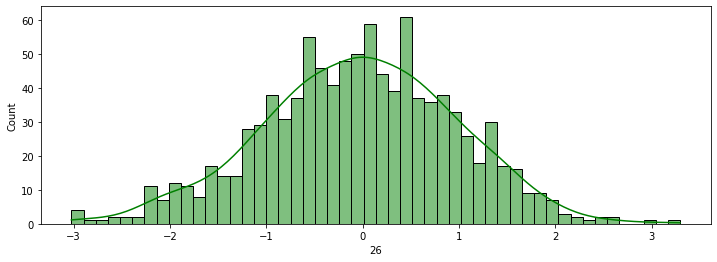

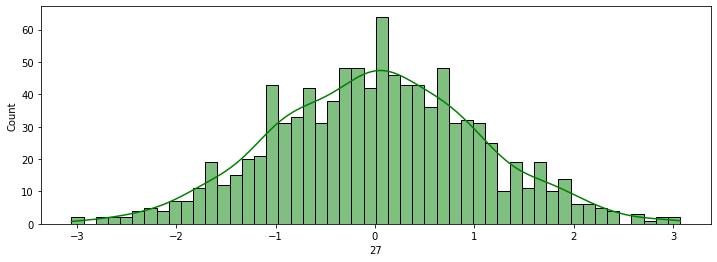

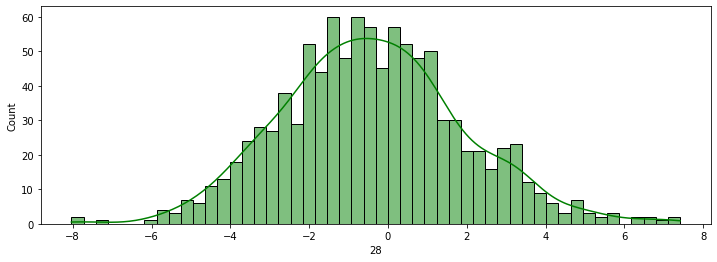

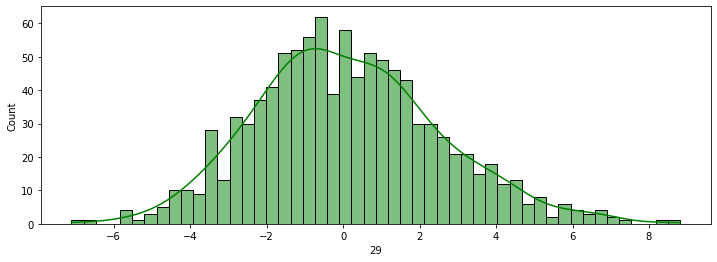

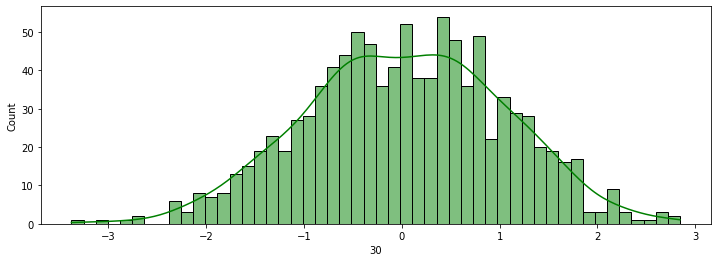

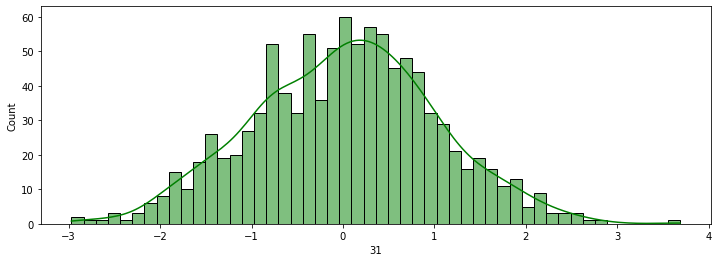

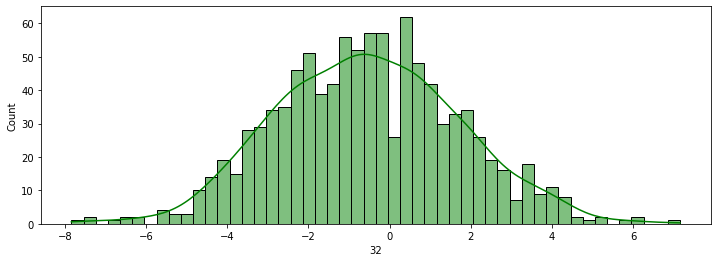

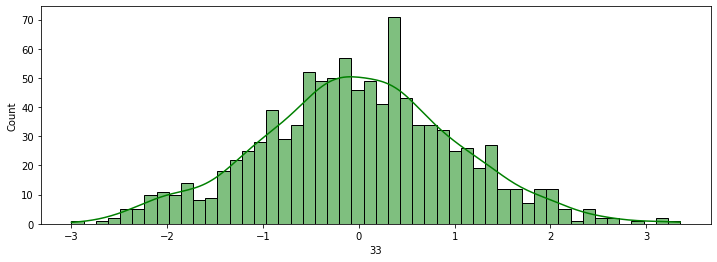

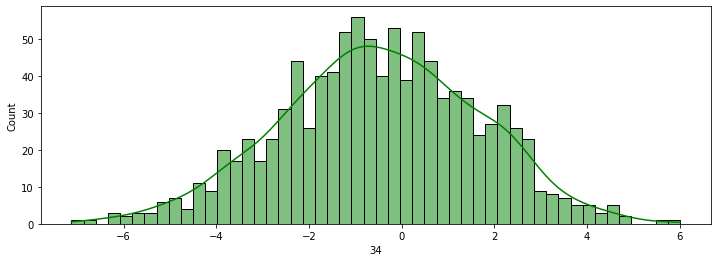

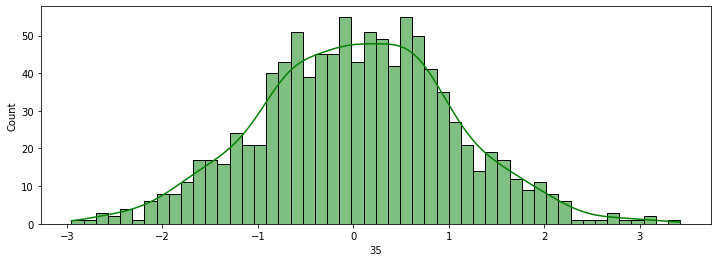

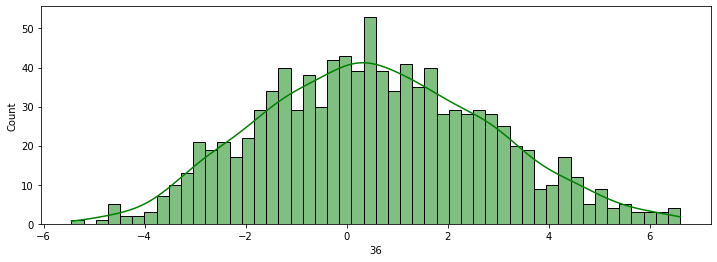

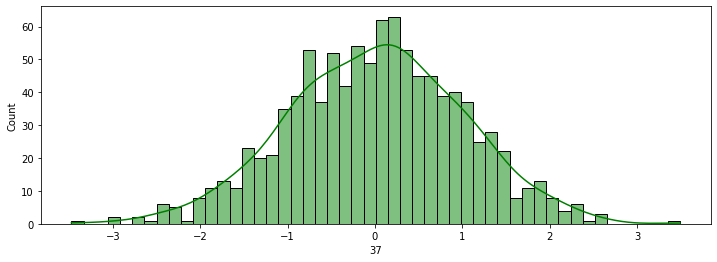

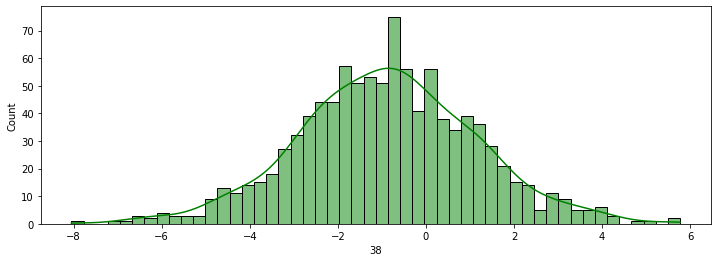

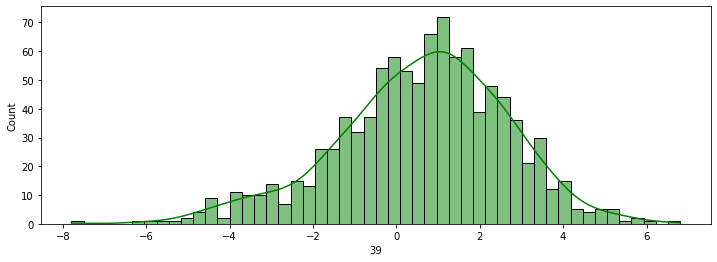

In [9]:
for column in x_train.columns:
    plot_continuous(x_train, column)
# Данные близкие к нормальному распределению

In [10]:
x_train['target'] = y_train
x_train['target'].value_counts()

# Target class is balanced   Целевой признак сбалансирован (классы сбалансированы)

1    510
0    490
Name: target, dtype: int64

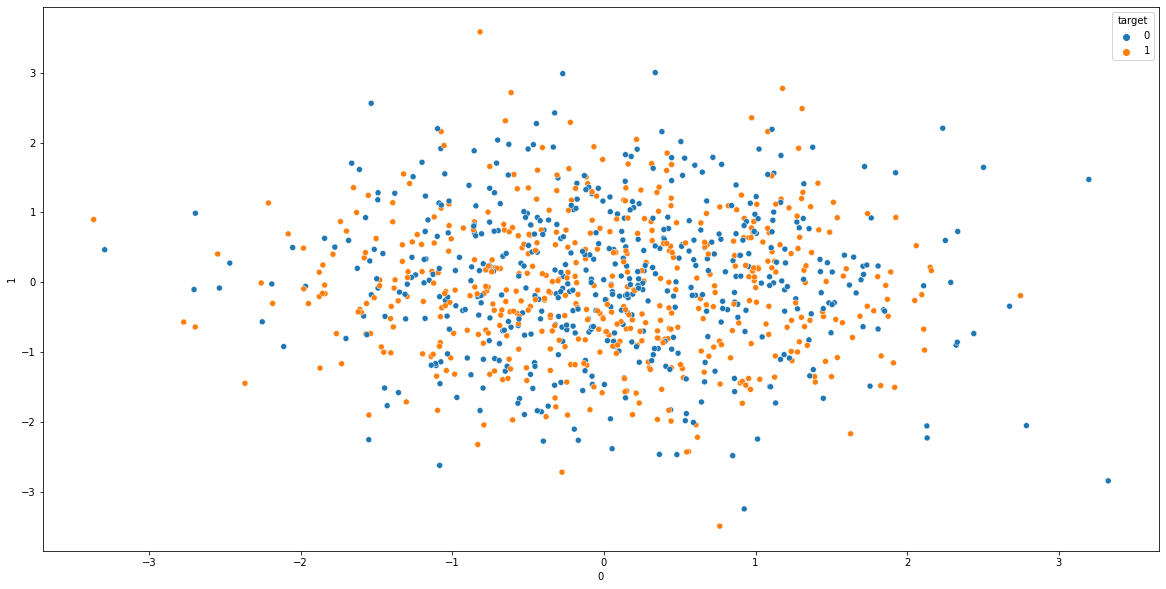

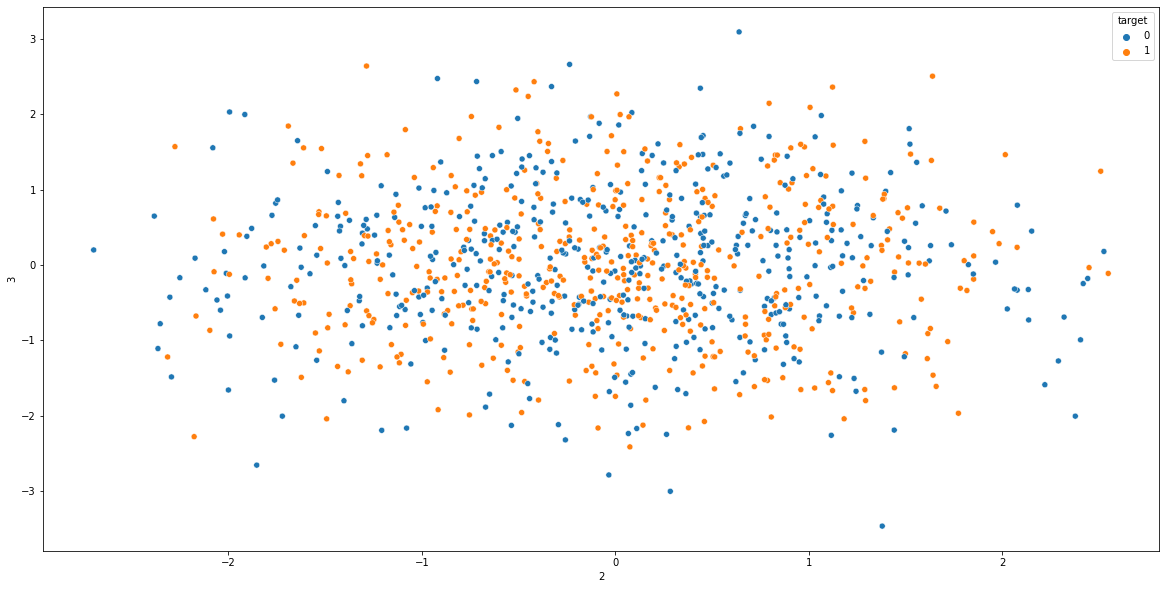

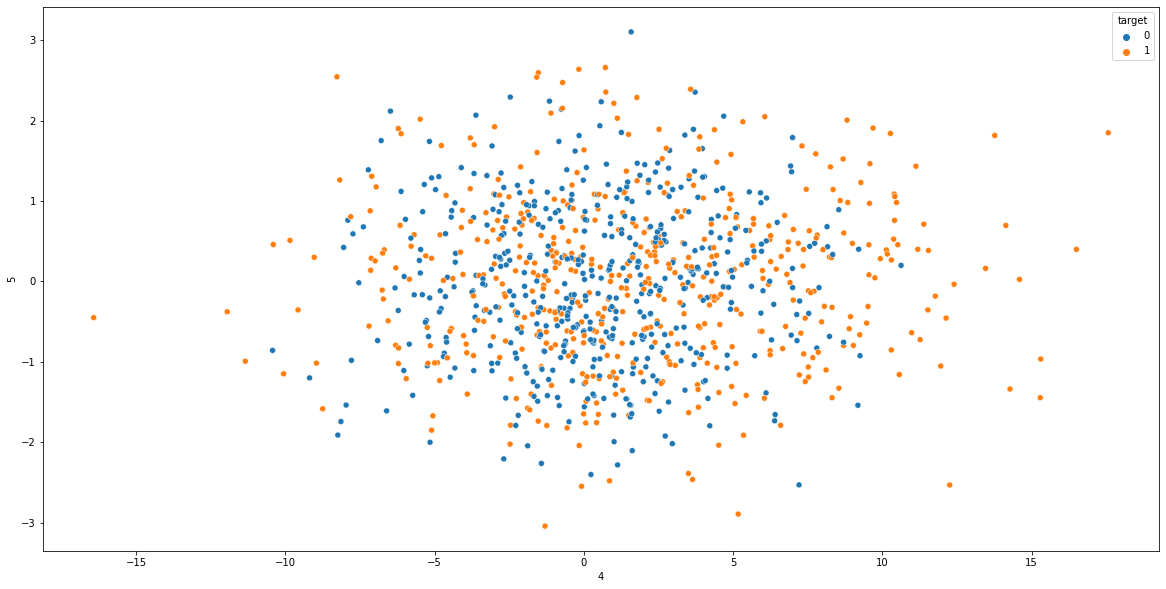

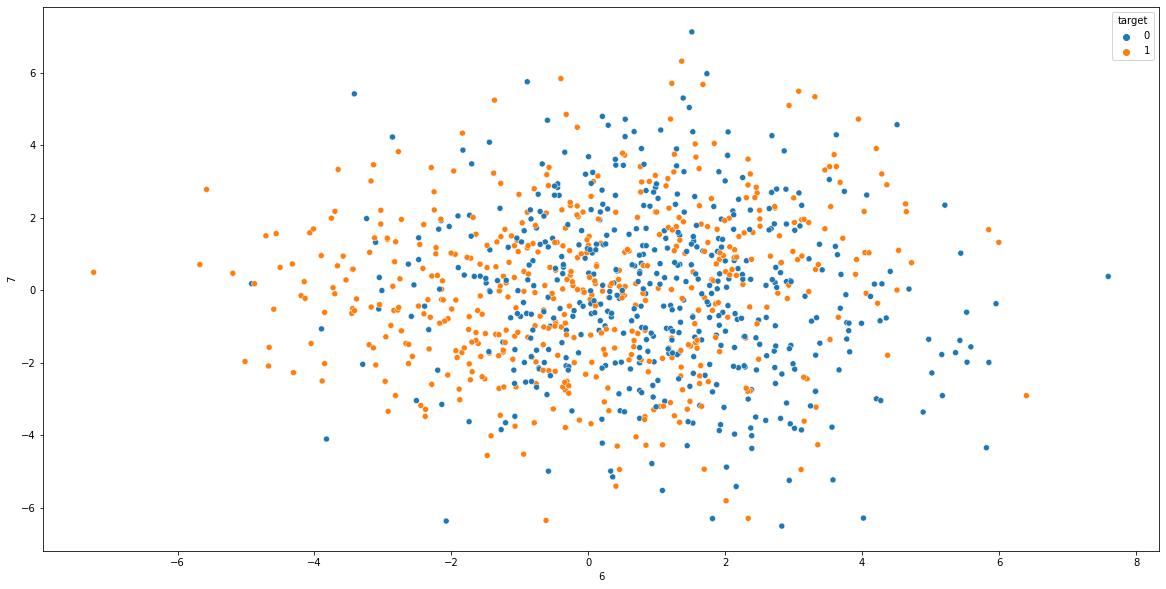

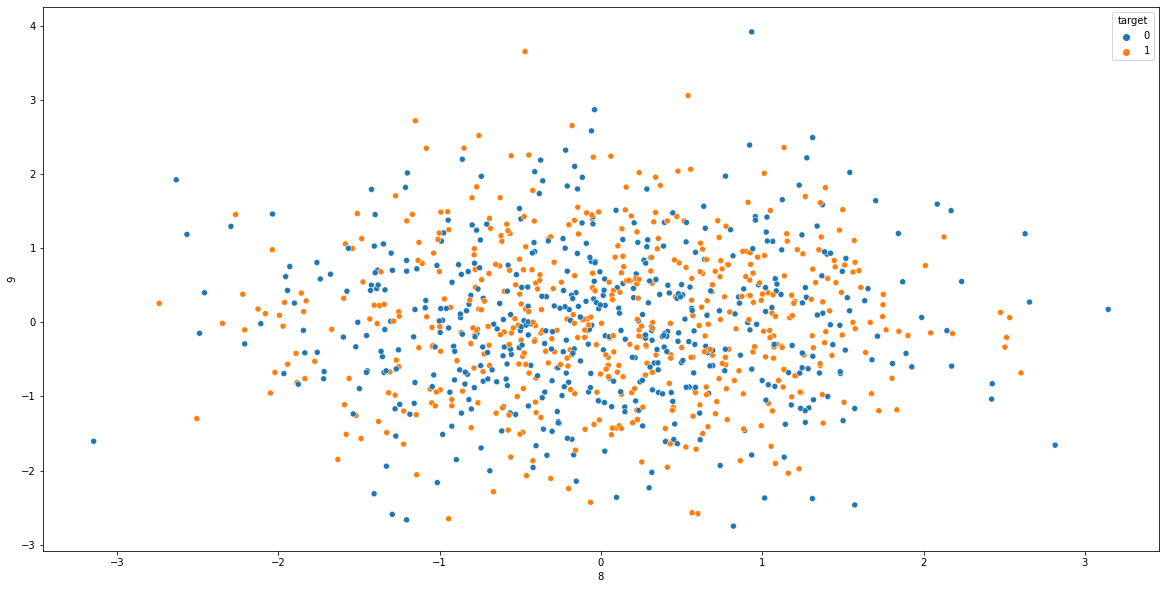

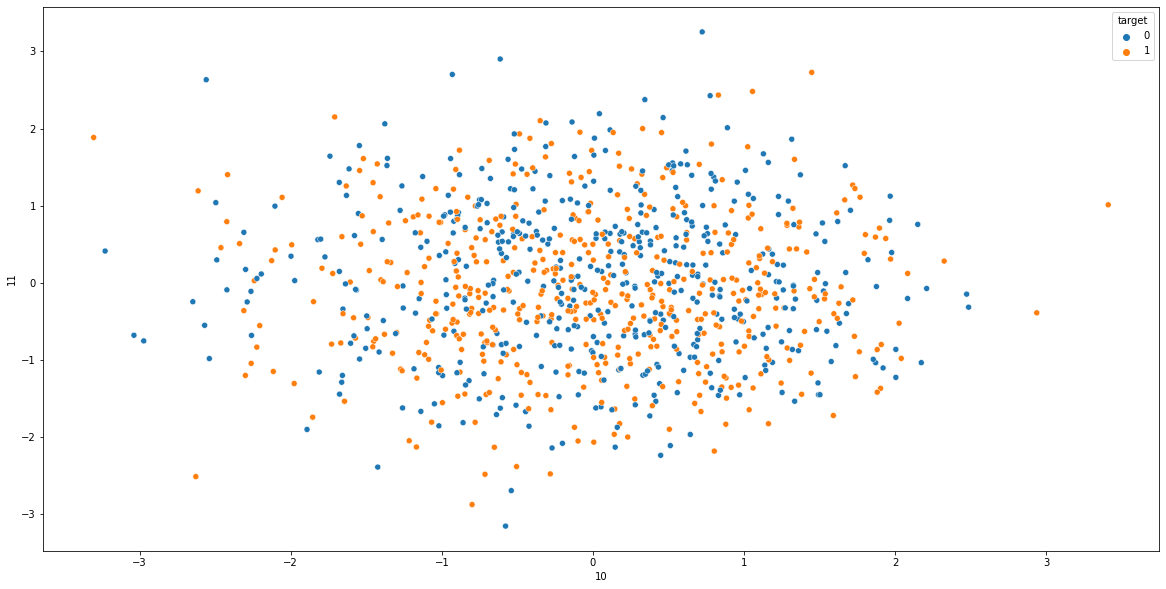

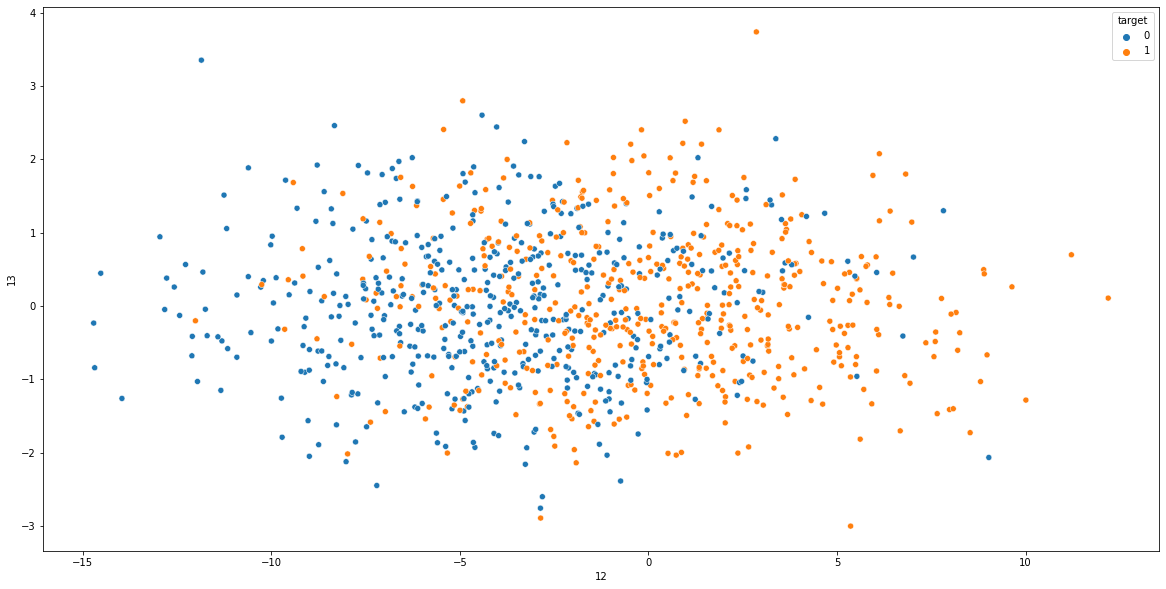

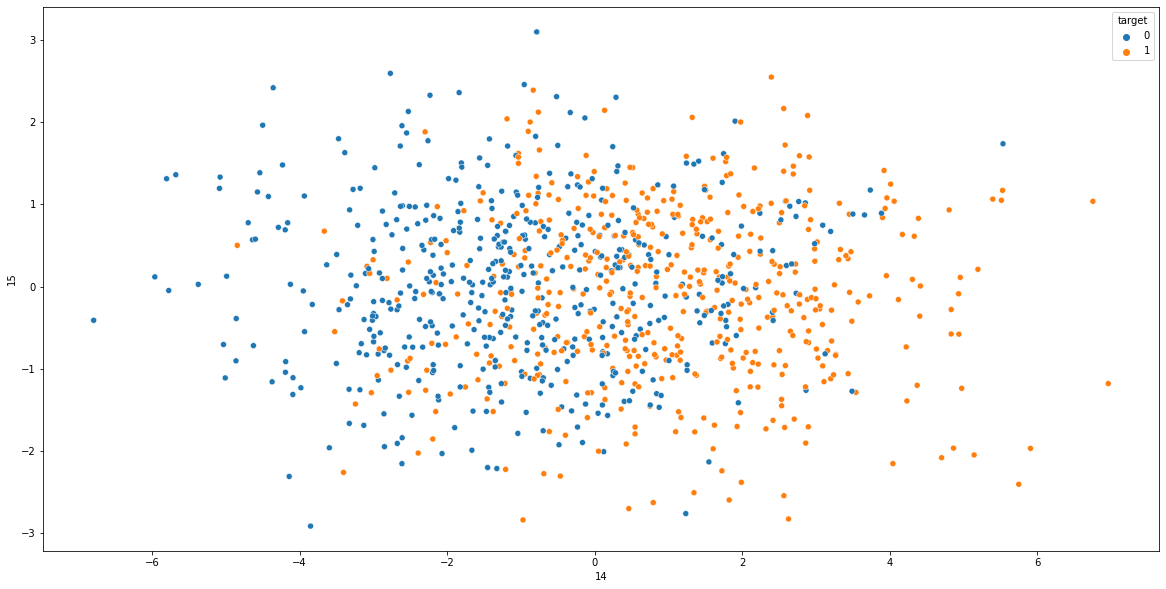

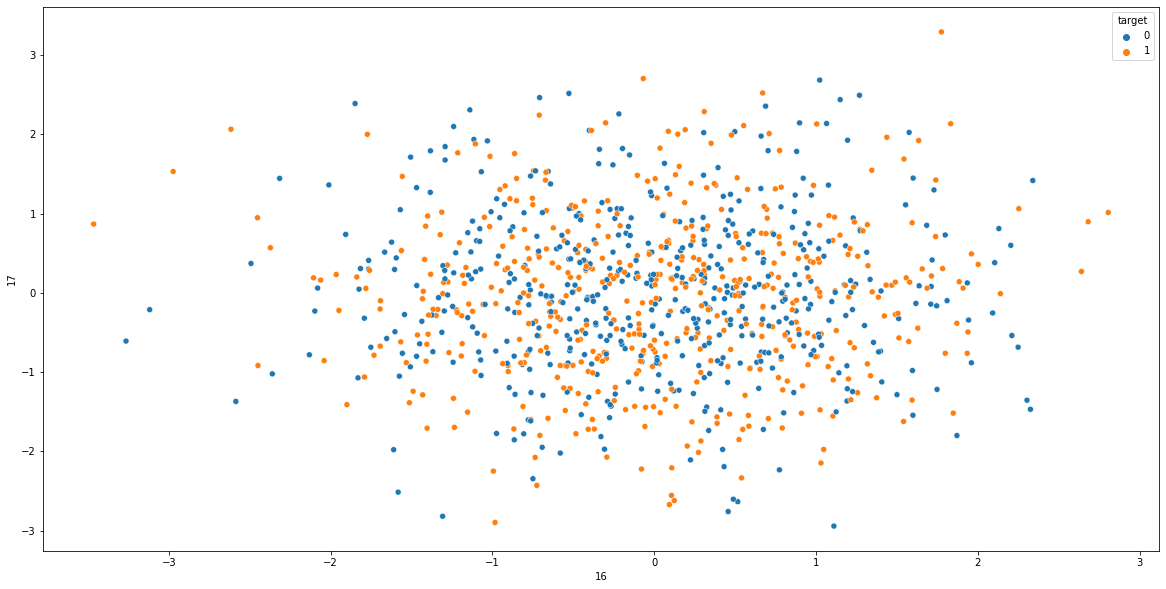

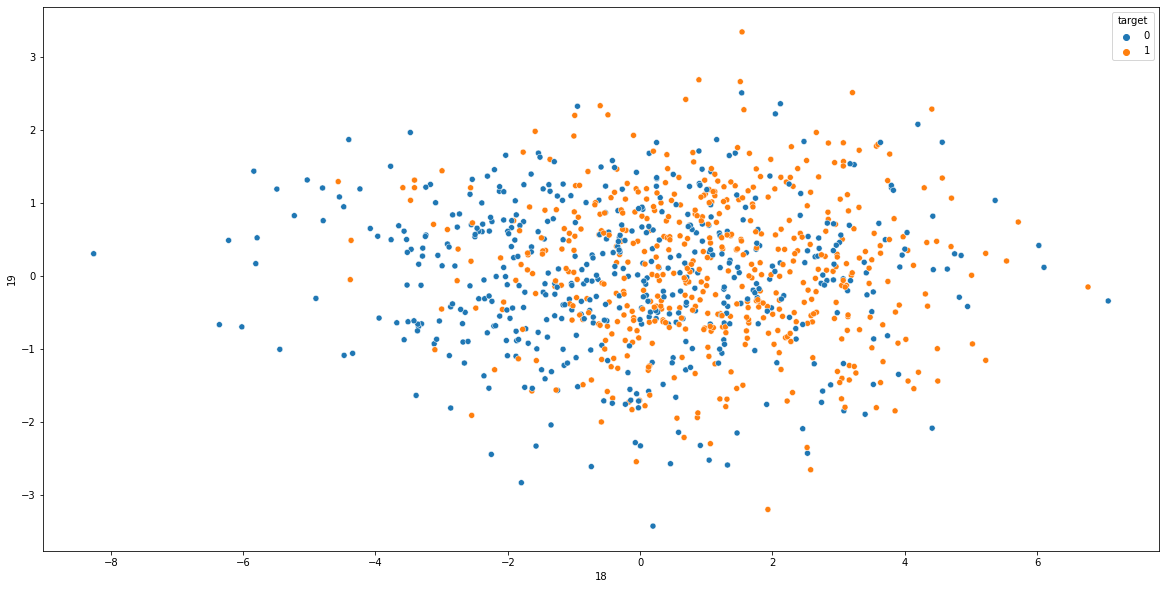

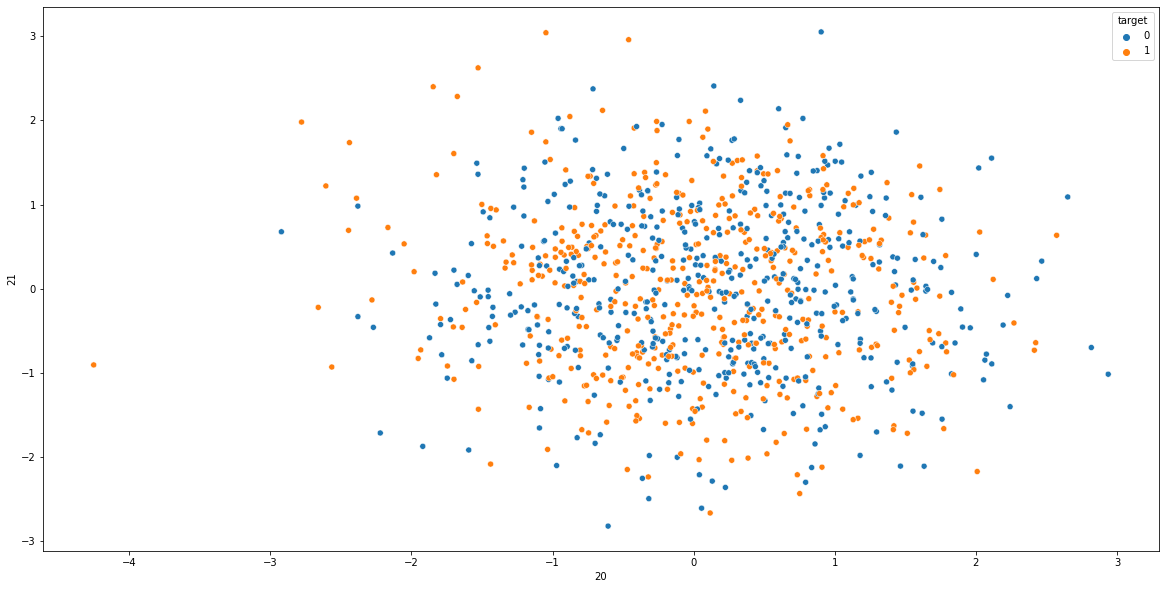

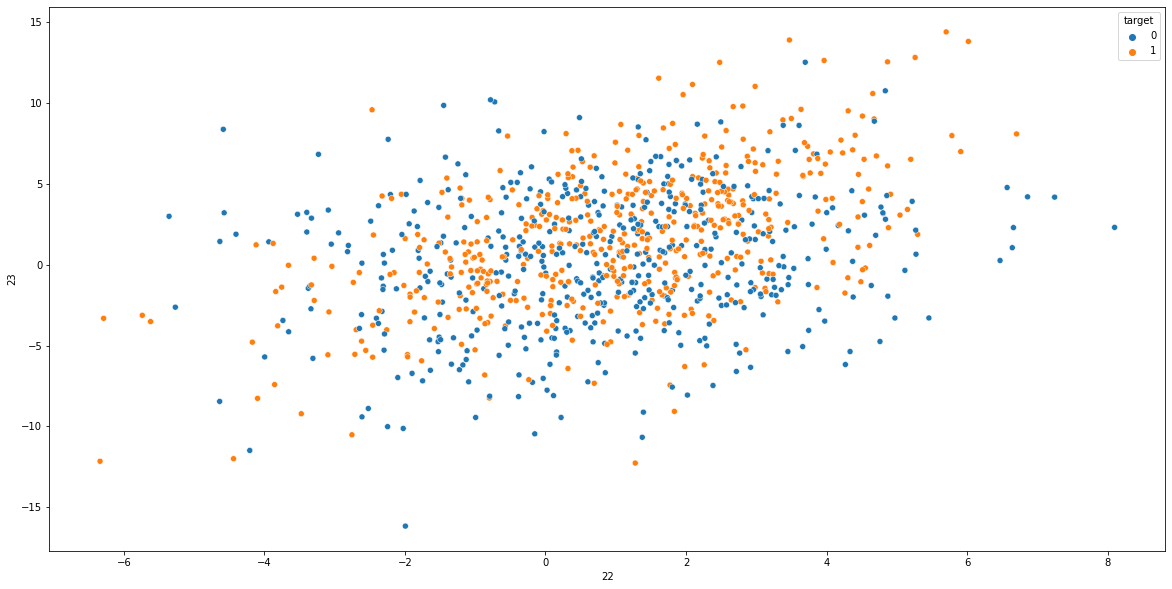

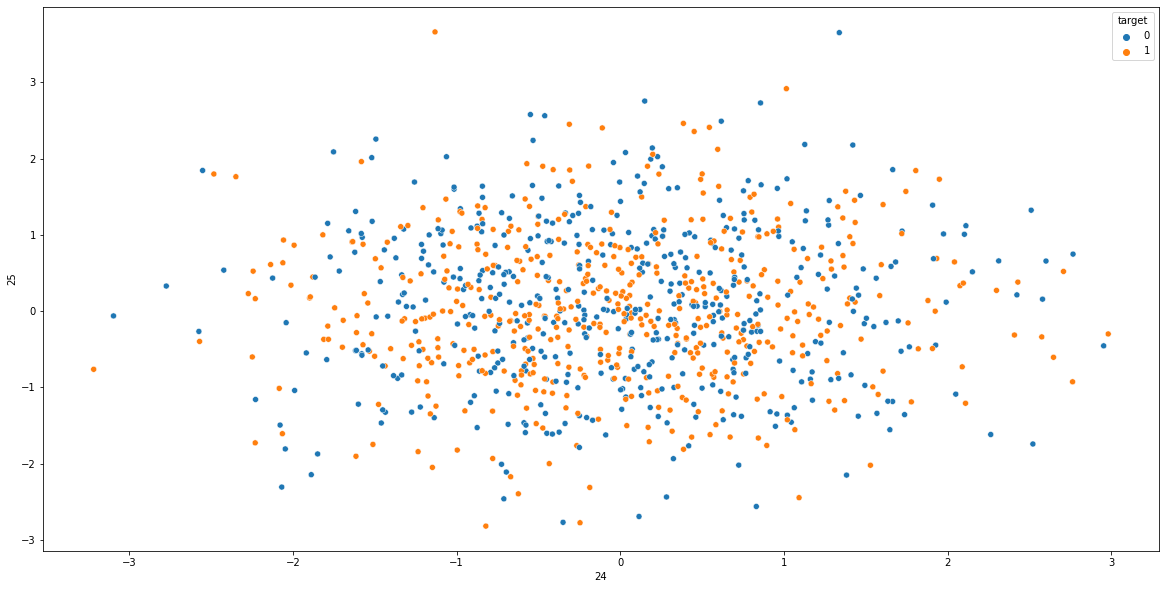

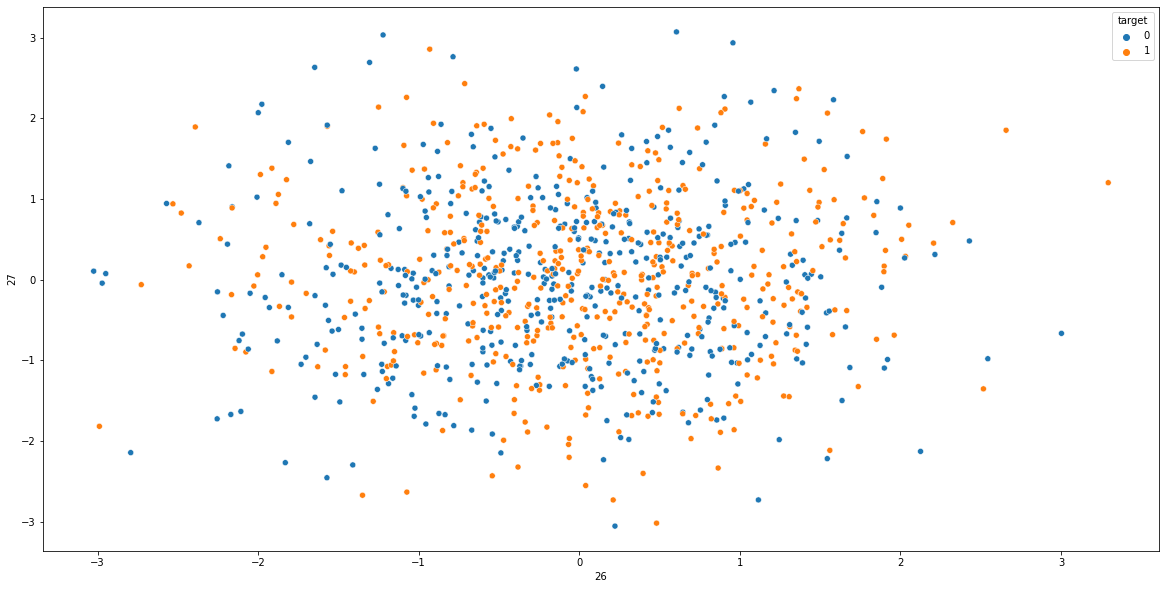

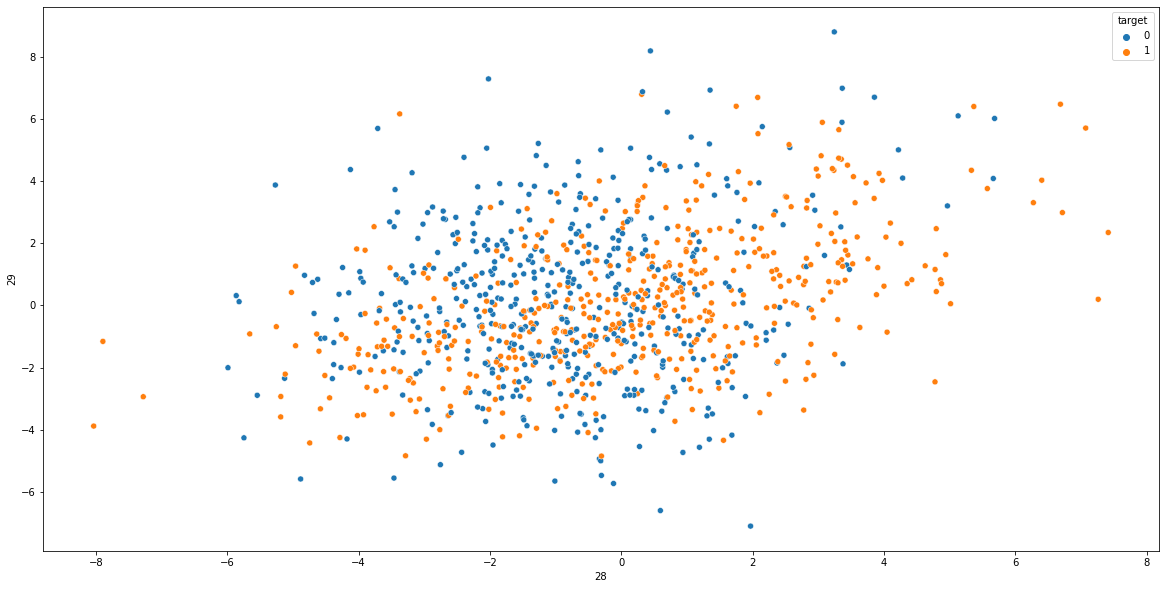

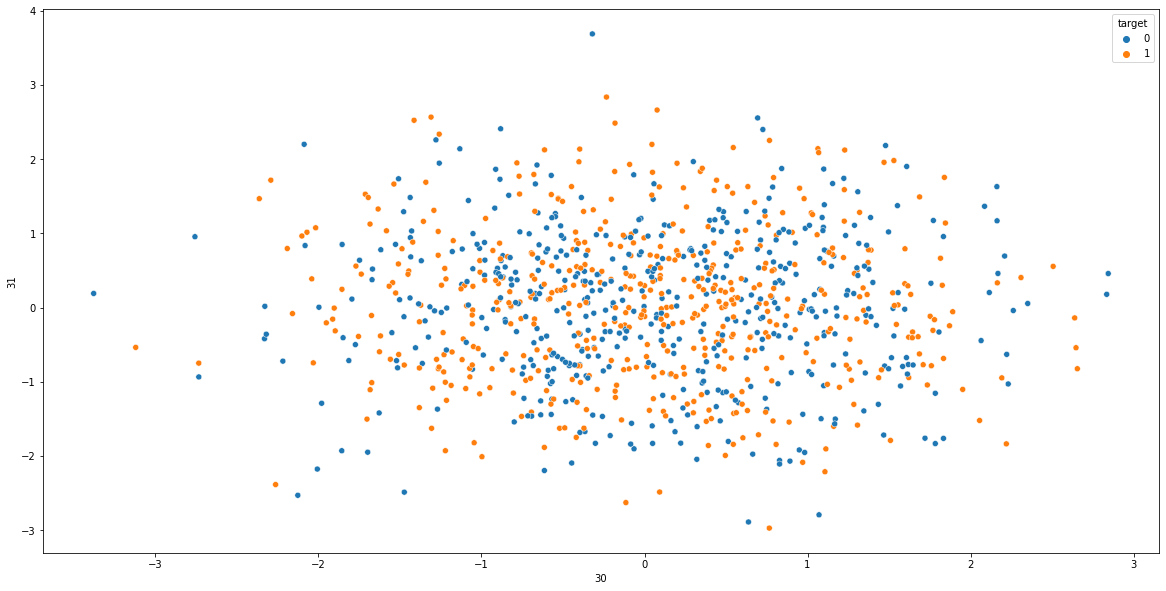

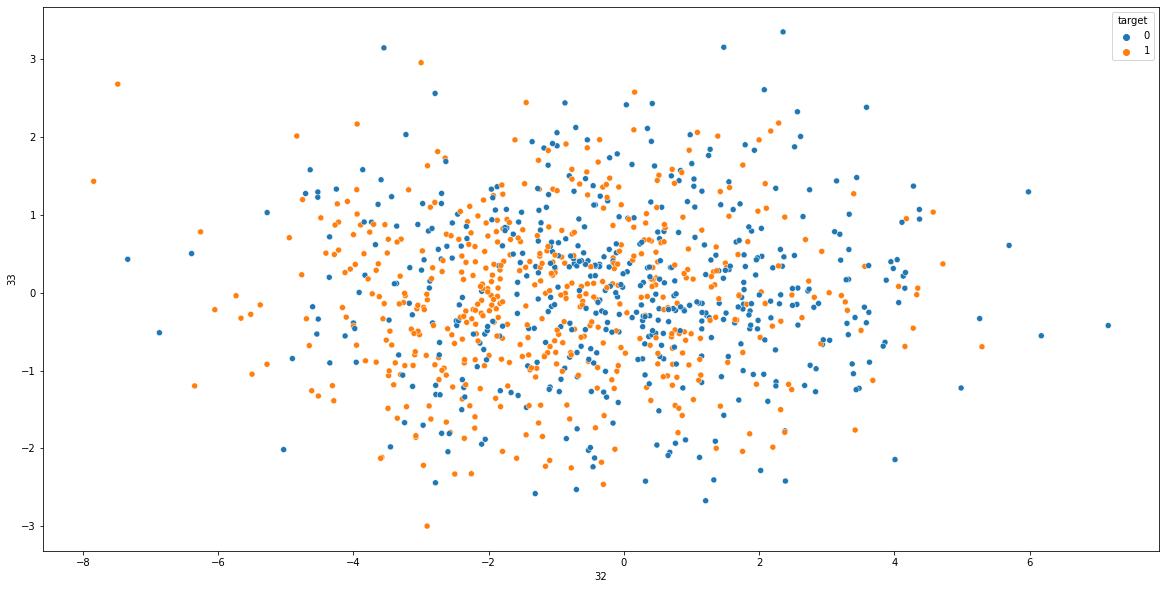

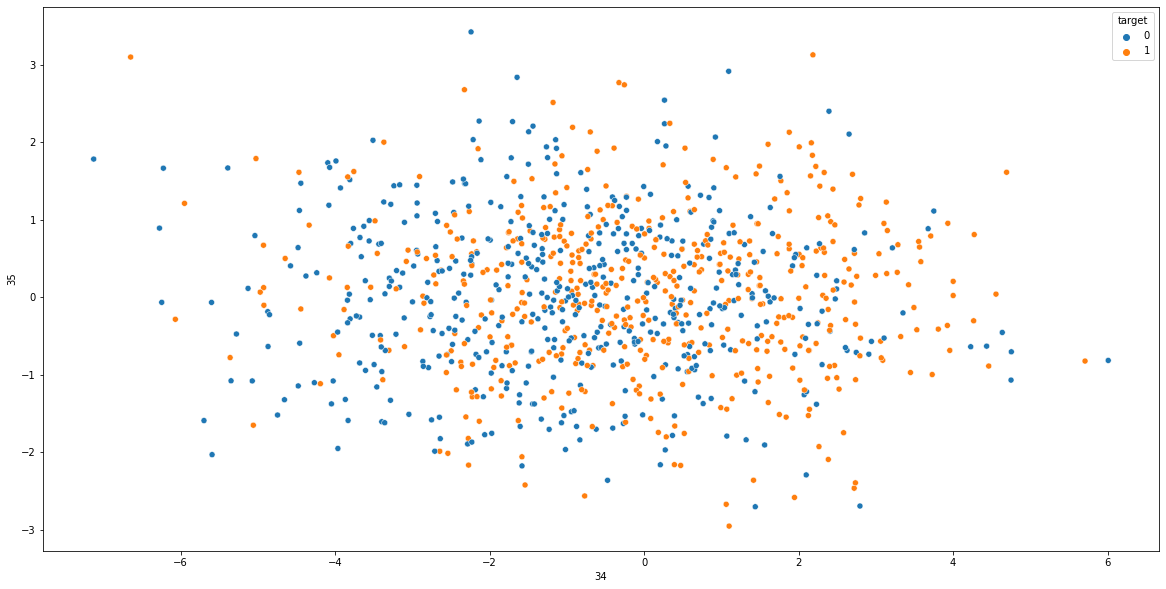

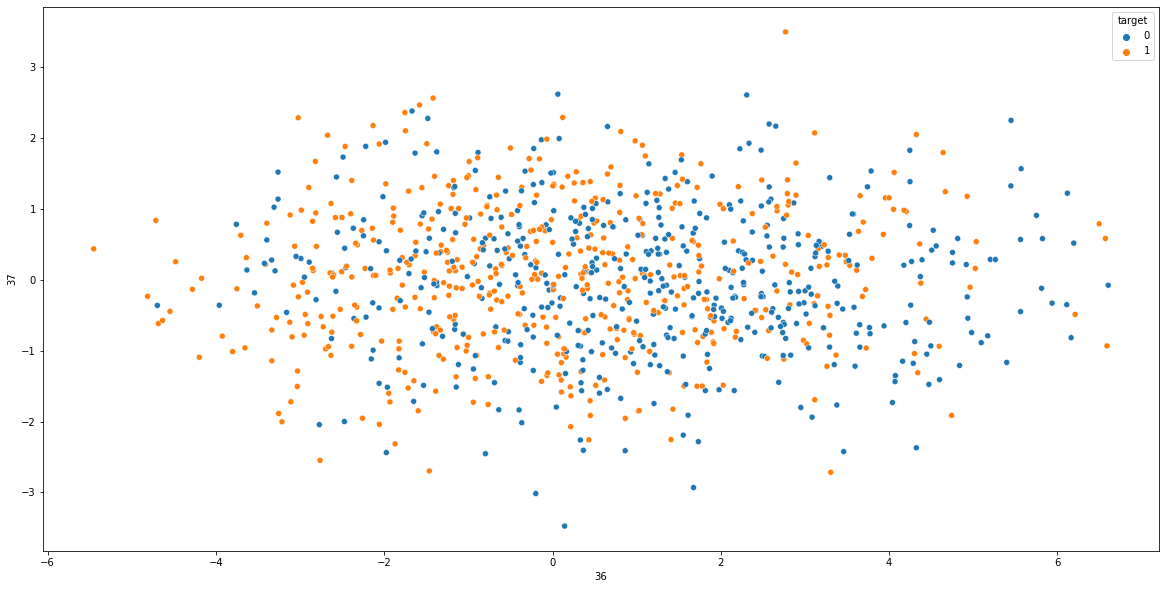

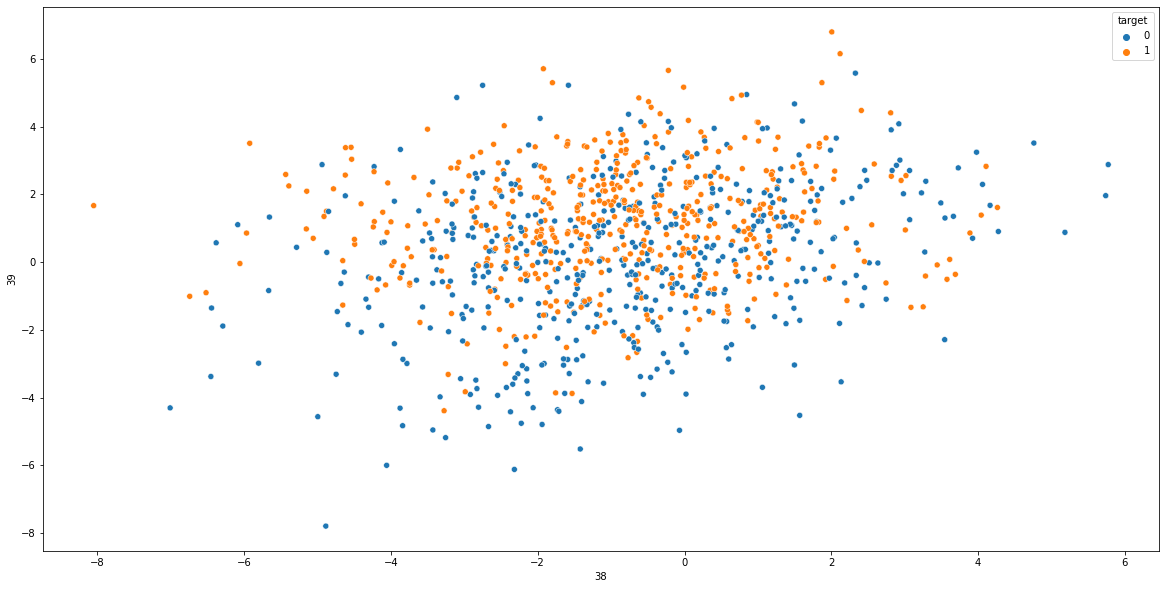

In [11]:
for column1 in range(0, 40, 2):
    plt.figure(figsize=[20,10])   
    sns.scatterplot(data=x_train, x=x_train[column1], y=x_train[column1+ 1], hue="target")
    plt.show()  
# Анализируя графики, делаем вывод, что не подходят методы svm, LogisticRegression ... потому что данные перемешаны

In [12]:
# clf = RandomForestClassifier()
clf = KNeighborsClassifier(n_neighbors=7)
x_train.drop('target', axis=1, inplace=True)

clf.fit(x_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=7)

In [13]:
print('train AUC =', roc_auc_score(y_train, clf.predict_proba(x_train)[:,1]))

train AUC = 0.98312525010004


In [14]:
predicted = pd.DataFrame(clf.predict(x_test))
predicted.rename(columns = {0 : 'Solution'}, inplace = True)
predicted.index += 1
predicted.to_csv('Submission.csv',index_label='Id')

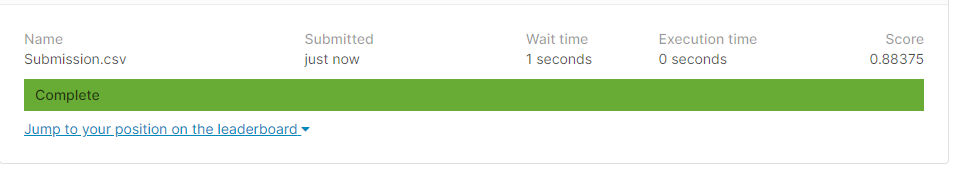